# Less is More: Dimensionality Analysis of Pure Random Orthogonal Search Through the Lens of Degrees of Freedom
***
Accepted in: Arabian Journal for Science and Engineering, Springer Publication [SCI Indexed]. Link to paper:

How to Cite:

For Any suggestions or doubt mail to: shahulshan81@gmail.com Cite the paper, if you find it useful.

For a intuitive and basic explanation of "What is Optimization" Watch this video: https://www.youtube.com/watch?v=Gu7si5T0z_w
***
In this paper we study how the notion of **Degrees of Freedom** influence the Pure Random Search (PRS) class of algorithms, with a special focus on the recently published Pure Random Orthogonal Search (PROS) algorithm. 

The general observation is, if we reduce the degrees of freedom we get better Optimization performance, and hence the title:
<h3 align="center">Less is More</h3> 

This is an easier to understand (heavily commented) version of the algorithms discussed in the paper. For an experiment ready version of these algorithms see the file titled: "Dimensionality Analysis (Experiment Ready Version).ipynb"

In [1]:
#header files
import numpy as np
import statistics

# A 10D and 2D Benchmark Function for Sample

**How To Run:** Run any one of the benchmark function first. And then run the required cells for the algorithm to be tried out.

The code of the benchmark functions were taken from: https://github.com/nathanrooy/landscapes/blob/master/landscapes/single_objective.py

In [2]:
def f(x): #F10 zakharov a 10 D function
    a, b = 0, 0
    for i, val in enumerate(x):
        a += val**2
        b += 0.5*i*val
    return a + b**2 + b**4
mrnge = [-5,10]   #The bound within which the global minima search is carried out in Zakharov
optimum = 0       #Well known optimum of the Zakharov function
D = 10            #Dimension of the objective function. 

In [ ]:
def f(x): #F11 Ackley A 2D function.
    x,y = x[0],x[1]
    '''
    Ackley Function
    wikipedia: https://en.wikipedia.org/wiki/Ackley_function
    global minium at f(x=0, y=0) = 0
    bounds: -35<=x,y<=35
    '''
    return (-20 * np.exp(-0.02 * np.sqrt(0.5 * (x*x + y*y))) -
            np.exp(0.5 * (np.cos(2.0*np.pi*x) + np.cos(2*np.pi*y))) + np.e + 20) #Ackley
mrnge = [-35,35]
optimum = 0       #Well known optimum of the Ackley function
D = 2             #Dimension of the objective function. 

# PROS
PROS is a special case of 'DF-d' algorithm where the 'd' is set to 1. See paper for more details. <br>
The original PROS algorithm is allowed to move only in the **Orthogonal Directions**.<br>
Original PROS Paper Link: https://www.mdpi.com/2076-3417/11/11/5053

In [3]:
#PROS
x = np.random.uniform(mrnge[0],mrnge[1], D)     #Randomly sampled initial point/candidate solution.
curr_best_estimate = f(x)                       #Temp variable to hold the best known location of the optimum as of now. It helps avoid unnecessary calls to the benchmark function
for _ in range (1000):                          #Run for 1000 Steps. 
    t = np.random.randint(D)                    #choose a dimension/component of the candidate soln randomly to modify.
    y = np.array(x)                             #np.array() is required for deep copy, or else shallow copy will occur.
    y[t] = np.random.uniform(mrnge[0],mrnge[1]) #At this point the new location y is orthogonal to x.
    if(f(y) < curr_best_estimate):              #If new location is better.
        x = y                                   #Remember the new location.
        curr_best_estimate = f(x)               #Remember the new location's function value.
print(f(x))                                     #Print the best obtained minima value.

68.60375815357173


# DF-*d*

This is the generalised version of the PROS and PRS algorithm. DF stands for Degrres of Freedom and the *d* stands for the particular 'Degree' (aka dimension). 

In [4]:
#Initialization of required variables. Run this before running DF-d. (DF-2 in this example)

d = 2                                          # Note that 'd' should be in the range of 1 <= d <= D, for the sake of this experiment we set it to 2. It could be of any allowed value.
x = np.random.uniform(mrnge[0],mrnge[1], D)    #Randomly sampled initial point/candidate solution.
curr_best_estimate = f(x)                      #Temp variable to hold the best known location of the optimum as of now. It helps avoid unnecessary calls to the benchmark function

#Note: If you set d = D or d = 1, then the following code is logically equivalent to PRS or PROS respectively.

In [5]:
for i in range (1000):
    randDims=np.random.choice(range(0, D), d, replace=False).tolist()      # Randomly Choose 'd' number of components without replacement (of the candidate soln) out of the 'D' available components. This is akin to line 4 of PROS algorithm.
    x_new = np.array(x)                                                    #np.array() is required for deep copy, or else shallow copy will occur.
    for i in randDims:                                                     #To manipulate / modify only the 'two' (in this case) randomly chosen components / Dimensions of the candidate soln. 'randDims' stores the two randomly chosen components
        x_new[i]=np.random.uniform(mrnge[0],mrnge[1])                      #Once this for loop completes we get the new candidate soln 'x_new'

    if(f(x_new) < curr_best_estimate):                                     #If new location is better.
        x = x_new                                                          #Remember the new location.
        curr_best_estimate = f(x)                                          #Remember the new location's function value.
print(f(x))     

14.016016307709243


# DDF-*d*
In Decayig DF-*d* (DDF-d) we start with the maximum degree of freedom (DF) the objective function allows and gradually decay it to the minimum. Say if the objective funciton is a 4 dimensional function, then we start with a degree of freedom of 4 and progressively decrease it to 1.

We equally divide the available budget among the all possible "DF-d's" the objective function permits. Say if 'd = 2' it means, DF-2 is being run. DF-2 implies that two componenets (out of the D components) of the candidate soln will be chosen randomly and will be modified.

Note that the max DF-d (i.e, DF-D) is nothing but PRS algorithm, and the least DF-d (i.e., DF-1) is PROS algorithm. 

In [6]:
#Initialization of required variables. Run this before running DDF-d

N =1000                                        #Total available budget or Total number of iterations
iteration=N//D                                 #To run 'DF-d' for 'N/D' steps, see paper for more details.
x = np.random.uniform(mrnge[0],mrnge[1], D)    #Randomly sampled initial point/candidate solution.
curr_best_estimate = f(x)                      #Temp variable to hold the best known location of the optimum as of now. It helps avoid unnecessary calls to the benchmark function

In [7]:
for d in range(D,0,-1):                                                   #The loop runs from 'D' to 1, where D is the Dimension of the Objective function. D is progressively decreased i.e., we decay from PRS to PROS
    for _ in range (iteration):
        randDims=np.random.choice(range(0, D), d, replace=False).tolist()         # Randomly Choose 'd' number of components (of the candidate soln) out of the 'D' available components. This is akin to line 4 of PROS algorithm.
        x_new = np.array(x)                                                       #np.array() is required for deep copy, or else shallow copy will occur.
        for i in randDims:                                                        #To manipulate / modify only the randomly chosen components / Dimensions of the candidate soln.
            x_new[i]=np.random.uniform(mrnge[0],mrnge[1])                         #Once this for loop completes we get the new candidate soln 'x_new'

        if(f(x_new) < curr_best_estimate):                                        #If new location is better.
            x = x_new                                                             #Remember the new location.
            curr_best_estimate = f(x)                                             #Remember the new location's function value.
print(f(x))                                                                       #Print the best obtained minima value.

23.52717892305178


# DPROS
Diagonal PROS. This is a slightly modified version of PROS, where diagonal movements are allowed.<br>
For the few initial iterations the DPROS algorithm is allowed to modify any two of the objective function's components chosen at random (i.e., *this allows diagonal movement.* See paper for more details). <br>
The idea is to allow diagonal movements initially to find and bootstrap potentially better locations/ candidate solutions. <br> <br>
For the  Remaining iterations PROS is executed. <br>
In this code, we choose the total number of iterations to be 1000 of which, we allot first 100 steps to DF-2 and the remaining 900 iterations to PROS ( aka, DF-1).

In [11]:
#Initialization of required variables. Run this before running DPROS
x = np.random.uniform(mrnge[0],mrnge[1], D)
curr_best_estimate = f(x)

In [12]:
for _ in range (100):                                                   #Run DF-2 for 100 steps. Allow diagonal movements for first 100 steps, to find nad bootstrap potentially better location.
    randDims=np.random.choice(range(0, D), 2, replace=False).tolist()   #Choose two components out of 'D' total components at random.
    x_new = np.array(x)  
    for i in randDims:
        x_new[i]=np.random.uniform(mrnge[0],mrnge[1])
    if(f(x_new) < curr_best_estimate):
        x = x_new
        curr_best_estimate = f(x)

for _ in range (900):                                                   #This block of code is logically same as PROS. But the code style is akin to the DDF-d style.
    randDims=np.random.choice(range(0, D), 1, replace=False).tolist()   #Only one component out of D will be chosen at random to be modified.
    x_new = np.array(x)  
    for i in randDims:                                                  #This loop will only run 1 time. (It could be removed)
        x_new[i]=np.random.uniform(mrnge[0],mrnge[1])
    if(f(x_new) < curr_best_estimate):
        x = x_new
        curr_best_estimate = f(x)
print(f(x))    

#For a more compact version of this code, see the other Ipynb file in this repository.

26.51904439417031


### Some Important Figures from the Paper

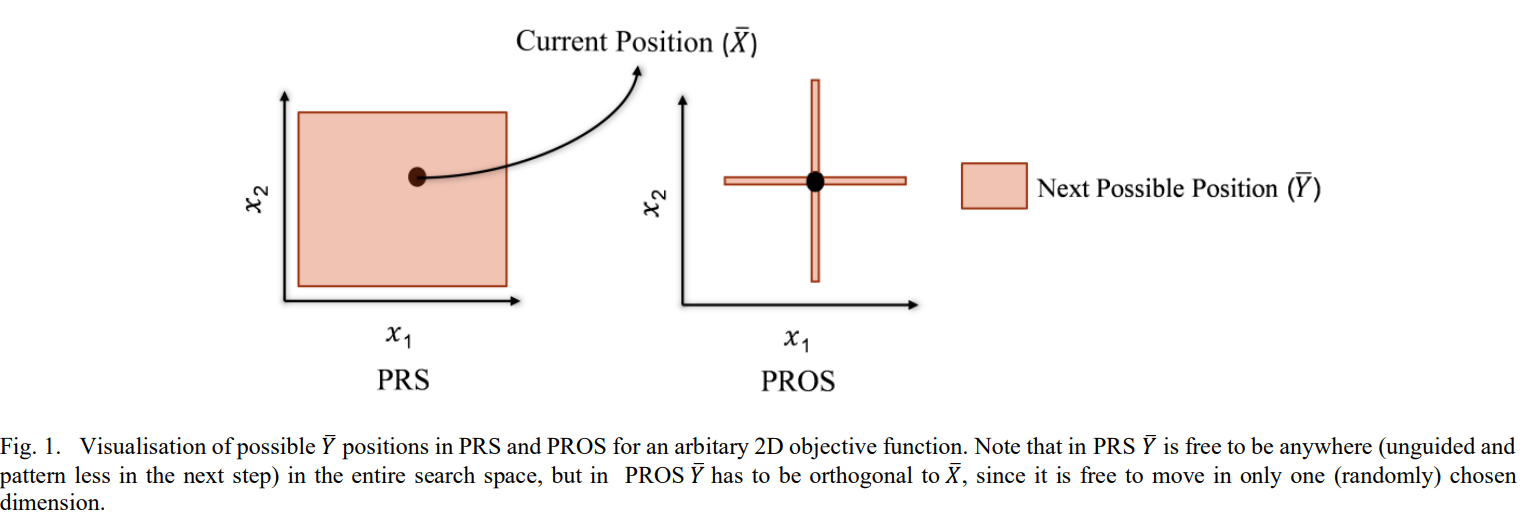

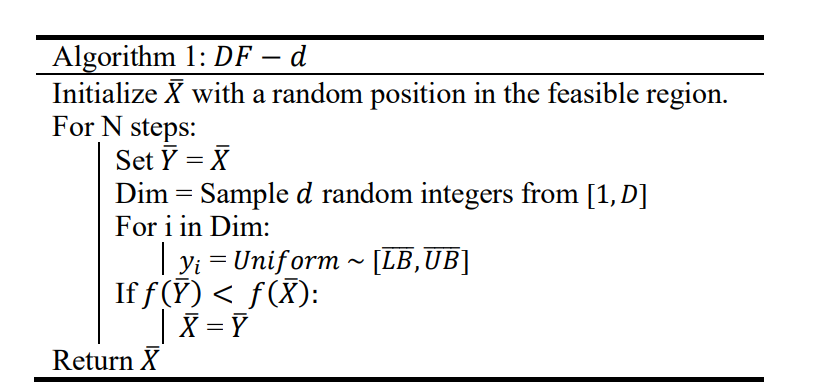

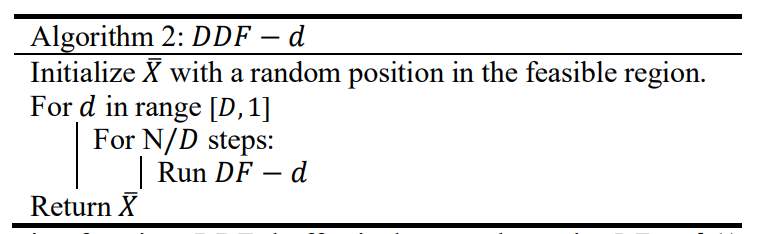

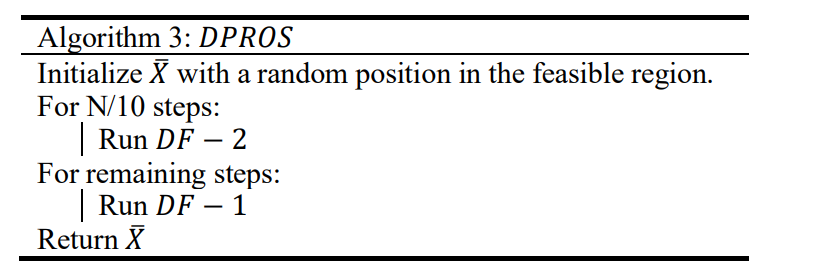